<a href="https://colab.research.google.com/github/SaionaraAraujo/Curso-DS-Sigmoidal/blob/master/Projeto_Airbnb_Manchester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

by [Saionara Araújo](https://www.linkedin.com/in/saionara-araujo/)
______________________________________________________________________
Análise dos Dados do Airbnb - Manchester


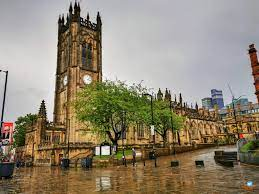

Para qualquer que seja a cidade, a Europa é sempre um bom destino para "turistar". E pensando nisso, resolvemos analisar a cidade de Manchester, que não é uma cidade muito grande, tem uma área total de cerca de 115,6km², então aumenta a possibilidade de passear a pé mesmo, evitando muito gasto com transporte, podendo conhecer os pontos turísticos da cidade de forma até mais personalizada. 

Como principais atrações turísticas da cidade, podemos citar  o Museu da Ciência e da Indústria, o Museu Nacional do Futebol, a Galeria de Arte de Manchester e a Catedral de Manchester. Além disso, há duas das opções muito famosas que são estádios de futebol, o estádio oficial do Manchester United e o estádio do Manchester City, que podem ser um belo passeio até para quem não é fã de carteirinha do esporte. Vamos explorar um pouco mais da cidade, conferindo os dados disponibilizados no Airbnb?

Mas o que seria o Airbnb? O Airbnb já é considerado como sendo a maior empresa hoteleira da atualidade, mesmo não possuindo nenhum hotel.

Com o objetivo de conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Vamos ao trabalho!

#Preparação do ambiente

Aqui, vamos agrupar todas as instalações e importações de bibliotecas necessárias.

##Instalações

In [4]:
#Biblioteca para plotar mapas
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importando Bibliotecas

In [5]:
#importar os pacotes necessários

import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import folium



In [6]:
#importar csv
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/greater-manchester/2021-12-23/visualisations/listings.csv")

# Análise dos dados

Nesta seção vamos análisar os dados que serão utilizados, as informações relevantes que podemos extrair deste conjunto, como é a divisão destes dados, se há valores ausentes no conjunto de dados, o que fazer com eles, dentre outras avaliações.

## Dicionário de variáveis

Inicialmente é ideal entender o que significa cada coluna do conjunto de dados. Para isso, criamos um dicionário com a definição de cada variável:

**Dicionário de variáveis**

*   **id** - Código identificador do Anúncio
*   **name** - Descrição do anúncio
*   **host_id**  - Código identificador do responsável pelo imóvel
*   **host_name** - Nome do responsável pelo imóvel
*   **neighbourhood_group** - Categoria do Bairro
*   **neighbourhood** - Bairro
*   **latitude** - Coordenada de Latitude do imóvel
*   **longitude** - Coordenada de Longitude do imóvel
*   **room_type** - Tipo de quarto disponível no imóvel
*   **price** - Preço da locação
*   **minimum_nights** - Mínimo de diárias
*   **number_of_reviews** - Número de avaliações
*   **last_review** - Última Avaliação
*   **reviews_per_month** - Avaliações por mês
*   **calculated_host_listings_count** - Número de anúncios do anfitrião na região
*   **availability_365** - Disponibilidade de dias nos próximos 365 dias
*   **number_of_reviews_ltm** - Número de avaliações nos últimos 12 meses
*   **license**



##Análise do dataset

A seguir, vamos conhecer nosso dataset, como as variáveis estão distribuídas. Para isso, vamos utilizar o método `head()`. Ele exibe a "cabeça" do dataframe, mostrando as 5 primeiras linhas. Essa função traz esse número por padrão, mas para alterar basta informar, nos parênteses, quantas linhas deseja exibir, como no exemplo: `df.head(10)`. 
É uma boa prática usar este comando, pois assim podemos conhecer melhor como são os dados que estaremos em contato.

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,157612,New attic space/single & Dble room,757016,Margaret,Salford,Salford District,53.50114,-2.26429,Entire home/apt,36,2,100,2021-11-19,0.83,1,323,4,NaN
1,283495,En-suite room in detached house,1476718,Alison,Rochdale,Rochdale District,53.56259,-2.21945,Private room,75,3,10,2018-08-05,0.12,1,342,0,NaN
2,299194,Cosy Garden Chalet for all seasons,1542010,Minh,Stockport,Stockport District,53.37600,-2.04462,Entire home/apt,50,2,293,2021-10-31,2.48,1,350,25,NaN
3,310742,Nice room 10 minutes walk from town,1603652,Francisca,Manchester,Ancoats and Clayton,53.48251,-2.22802,Private room,34,180,64,2018-01-12,0.53,1,330,0,NaN
4,390028,Single Room with Private Bathroom,1951261,Gillian,Stockport,Stockport District,53.38927,-2.21401,Private room,36,2,40,2019-11-22,0.39,1,356,0,NaN


Podemos também analisar como os dados estão dispostos nas últimas linhas do conjunto. Essa breve análise pode nos ajudar a entender se os dados estão armazenados corretamente nas últimas linhas e possíveis valores ausentes nestas posições. Para isso, vamos utilizar o método `tail()`, que assim como o `head()`, trás 5 linhas, por padrão, mas pode ser alterado conforme a finalidade do uso do método.

In [8]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3442,53928326,Standard One Bedroom Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48738,-2.26434,Entire home/apt,83,1,0,NaN,NaN,6,282,0,NaN
3443,53928816,One Bedroom Apartment with Balcony,436761088,Dream Apartments Manchester,Salford,Salford District,53.48555,-2.26640,Entire home/apt,89,1,0,NaN,NaN,6,282,0,NaN
3444,53929808,One Bedroom Penthouse Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48766,-2.26635,Entire home/apt,109,1,0,NaN,NaN,6,275,0,NaN
3445,53932046,Standard Two Bedroom Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48557,-2.26634,Entire home/apt,97,1,0,NaN,NaN,6,279,0,NaN
3446,53935356,NEW! large double bedroom in Levenshulme,28598729,Or,Manchester,Levenshulme,53.44099,-2.19294,Private room,32,3,0,NaN,NaN,1,74,0,NaN


###Tipos de Dados

Ainda sobre entender e conhecer os dados, para entender como lidar com as variáveis, vamos identificar o tipo de cada uma delas, através do comando `dtypes`, que nos mostra o tipo de cada variável ou coluna do dataframe:

In [9]:
#Tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Analisando o tipo de dados, podemos verificar se alguma variável está no tipo que nos será útil ou não. Caso seja algo que impacte nas análises, podemos tratar e adequar. Vamos utilizar como exemplo um tratamento da variável `last_review`, que é do tipo `object`, um tipo de dado bastante genérico. Podemos alterar o tipo do dado para que possa ser utilizado mais facilmente futuramente. Neste caso, vamos utilizar o conceito da função `lambda` para extrair os meses e anos desta coluna, para que se for necessário utilizar estes dados, possamos acessar de forma mais ágil.

In [10]:
df['last_year_review'] = df['last_review'].apply(lambda x: str(x)[:4])
df['last_month_review'] = df['last_review'].apply(lambda x: str(x)[5:7])

A seguir, vamos ver como ficaram as novas colunas criadas.

In [11]:
df.last_year_review

0       2021
1       2018
2       2021
3       2018
4       2019
        ... 
3442     nan
3443     nan
3444     nan
3445     nan
3446     nan
Name: last_year_review, Length: 3447, dtype: object

In [12]:
df.last_month_review

0       11
1       08
2       10
3       01
4       11
        ..
3442      
3443      
3444      
3445      
3446      
Name: last_month_review, Length: 3447, dtype: object

Vimos que há uma variável `id` e que poderia ser o identificador de cada imóvel cadastrado. Para isso, vamos usar o método `set_index()`:

In [13]:
df.set_index('id')

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,last_year_review,last_month_review
id,,,,,,,,,,,,,,,,,,,
157612,New attic space/single & Dble room,757016,Margaret,Salford,Salford District,53.50114,-2.26429,Entire home/apt,36,2,100,2021-11-19,0.83,1,323,4,NaN,2021,11
283495,En-suite room in detached house,1476718,Alison,Rochdale,Rochdale District,53.56259,-2.21945,Private room,75,3,10,2018-08-05,0.12,1,342,0,NaN,2018,08
299194,Cosy Garden Chalet for all seasons,1542010,Minh,Stockport,Stockport District,53.37600,-2.04462,Entire home/apt,50,2,293,2021-10-31,2.48,1,350,25,NaN,2021,10
310742,Nice room 10 minutes walk from town,1603652,Francisca,Manchester,Ancoats and Clayton,53.48251,-2.22802,Private room,34,180,64,2018-01-12,0.53,1,330,0,NaN,2018,01
390028,Single Room with Private Bathroom,1951261,Gillian,Stockport,Stockport District,53.38927,-2.21401,Private room,36,2,40,2019-11-22,0.39,1,356,0,NaN,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53928326,Standard One Bedroom Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48738,-2.26434,Entire home/apt,83,1,0,NaN,NaN,6,282,0,NaN,nan,
53928816,One Bedroom Apartment with Balcony,436761088,Dream Apartments Manchester,Salford,Salford District,53.48555,-2.26640,Entire home/apt,89,1,0,NaN,NaN,6,282,0,NaN,nan,
53929808,One Bedroom Penthouse Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48766,-2.26635,Entire home/apt,109,1,0,NaN,NaN,6,275,0,NaN,nan,


Além de saber como os dados são, precisamos conhecer também as dimensões do nosso dataframe. O método `shape[]` pode nos trazer esta informação. Aqui já sabemos que os colchetes tratam de listas, então para acessar os valores precisamos colocar o índice desejado. Para tabelas com 2 dimensões, o índice **0** representa as **linhas** e o **1** as **colunas**. Sendo a sintaxe do método conforme segue:

In [14]:
#quantidade de linhas:
print("Linhas:",df.shape[0])
print("Colunas:",df.shape[1])

Linhas: 3447
Colunas: 20


##Valores Ausentes

Agora analisemos a porcentagem de dados faltantes no conjunto de dados:

In [15]:
print("Quantidade (em %) de dados faltantes para cada coluna: ")
#Soma a quantidade de campos vazios, dividindo pelo total de linhas e ordenando do maior (o que tem maior número de linhas vazias) para o menor
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Quantidade (em %) de dados faltantes para cada coluna: 


license                           1.000000
reviews_per_month                 0.192341
last_review                       0.192341
host_name                         0.000580
id                                0.000000
number_of_reviews                 0.000000
last_year_review                  0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
minimum_nights                    0.000000
name                              0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
last_month_review                 0.000000
dtype: float64

Esse resultado está sendo exibido em % para melhor direcionar a decisão sobre como tratar estes dados. Sobre as revisões mensais, podemos assumir que seja um dado relevante, caso tenhámos o objetivo de analisar o comportamento dessa variável ao longo do tempo, e linkar com outra variável e identificar, por exemplo, que em determinado mês, um imóvel foi muito avaliado e no mês seguinte não. Então podemos achar aí, um período que pode ser explorado. Vamos identificar se há uma linearidade na ausência de dados, ou se ocorrem de forma "aleatória". Para isso, podemos utilizar as variáveis que criamos para armazenar o mês e o ano das última avaliações do imóvel.

In [16]:
df.set_index('last_year_review').isna().sum(level=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,last_month_review
last_year_review,,,,,,,,,,,,,,,,,,,
2021,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2400,0
2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0
2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143,0
2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,166,0
nan,0,0,0,0,0,0,0,0,0,0,0,0,663,663,0,0,0,663,0
2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0
2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0


In [17]:
df.set_index('last_month_review').isna().sum(level=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,last_year_review
last_month_review,,,,,,,,,,,,,,,,,,,
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,559,0
08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,321,0
01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1286,0
02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0
07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0
,0,0,0,0,0,0,0,0,0,0,0,0,663,663,0,0,0,663,0
06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,0


Com o comando acima, podemos ver que em todos os anos e meses há dados registrados, o que descarta a possibilidade de que os dados tenham sido registrados a partir de determinado ponto, e reforça a hipótese de que os dados ausentes ocorrem por alguma motivo, mas não de forma linear.

O que podemos concluir sobre os dados faltantes:
* A coluna `license` não tem valores preenchidos, e seu tipo foi definido com `float64`, se conferirmos na exibição de tipor de dados. Essa conversão é feita pelo próprio Pandas,e  pode ser mais explorada em sua documentação; Por estar completamente vazio, e não representar muito valor para nossa análise, vamos excluir esta coluna.
* As colunas `reviews_per_month` e `last_review`contem pouco mais de 19% das linhas com valores ausentes. Depois dos exemplos que fizemos acima, poderemos excluir estas colunas também, já que não serão utilizadas neste trabalho;
* A coluna `host_name` tem poucos dados faltantes;
* Todas as demais colunas não possuem valores ausentes.

In [18]:
#Excluir colunas completamente vazias
df.drop(columns = ['license'], inplace=True)
df.drop(columns = ['last_review', 'reviews_per_month'], inplace=True)

#Excluir linhas com dados faltantes
df.dropna(axis=0,inplace=True)


Para garantir a variável de identificação, vamos setar o id do registro como identificador do dataframe.

In [19]:
df.set_index('id')

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_year_review,last_month_review
id,,,,,,,,,,,,,,,,
157612,New attic space/single & Dble room,757016,Margaret,Salford,Salford District,53.50114,-2.26429,Entire home/apt,36,2,100,1,323,4,2021,11
283495,En-suite room in detached house,1476718,Alison,Rochdale,Rochdale District,53.56259,-2.21945,Private room,75,3,10,1,342,0,2018,08
299194,Cosy Garden Chalet for all seasons,1542010,Minh,Stockport,Stockport District,53.37600,-2.04462,Entire home/apt,50,2,293,1,350,25,2021,10
310742,Nice room 10 minutes walk from town,1603652,Francisca,Manchester,Ancoats and Clayton,53.48251,-2.22802,Private room,34,180,64,1,330,0,2018,01
390028,Single Room with Private Bathroom,1951261,Gillian,Stockport,Stockport District,53.38927,-2.21401,Private room,36,2,40,1,356,0,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53928326,Standard One Bedroom Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48738,-2.26434,Entire home/apt,83,1,0,6,282,0,nan,
53928816,One Bedroom Apartment with Balcony,436761088,Dream Apartments Manchester,Salford,Salford District,53.48555,-2.26640,Entire home/apt,89,1,0,6,282,0,nan,
53929808,One Bedroom Penthouse Apartment,436761088,Dream Apartments Manchester,Salford,Salford District,53.48766,-2.26635,Entire home/apt,109,1,0,6,275,0,nan,


##Distribuição das variáveis numéricas

Aparentemente, nenhuma das variáveis tem uma distribuição normal perfeita. As que mais se aproximam desta realidade são `latitude`e `longiude`. Além disso, é possível perceber a presença de *outliers* (valores muito discrepantes) principalmente nas colunas `number_of_reviews`,`calculated_host_listings_count`,`price`e `mimun_nights`.

Isso significa que os dados não têm muita similirade de valores, ou seja, se calcularmos a média e o desvio padrão, possivelmente teremos valores bem variados:

In [20]:
#descrição estatística das variáveis numéricas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.445000e+03,3.445000e+03,3445.000000,3445.000000,3445.000000,3445.00000,3445.000000,3445.000000,3445.000000,3445.000000
mean,3.768537e+07,1.677999e+08,53.475788,-2.253146,163.693179,9.47344,31.413643,15.754717,196.876633,9.544557
std,1.470350e+07,1.309866e+08,0.048806,0.093337,316.874738,43.79061,61.685604,43.044658,131.909870,17.136726
min,1.576120e+05,2.353030e+05,53.335680,-2.708970,10.000000,1.00000,0.000000,1.000000,0.000000,0.000000
25%,2.769830e+07,4.452872e+07,53.449670,-2.283020,45.000000,1.00000,1.000000,1.000000,79.000000,0.000000
50%,4.185786e+07,1.520645e+08,53.475560,-2.238880,80.000000,2.00000,9.000000,3.000000,178.000000,4.000000
75%,5.075446e+07,2.581408e+08,53.489610,-2.217550,136.000000,3.00000,34.000000,9.000000,339.000000,13.000000
max,5.393536e+07,4.367611e+08,53.652620,-1.976340,7372.000000,365.00000,1304.000000,191.000000,365.000000,472.000000


Como próximo passo, vamos analisar o tipo de distribuição das variáveis numéricas dos dados, plotando um histograma:

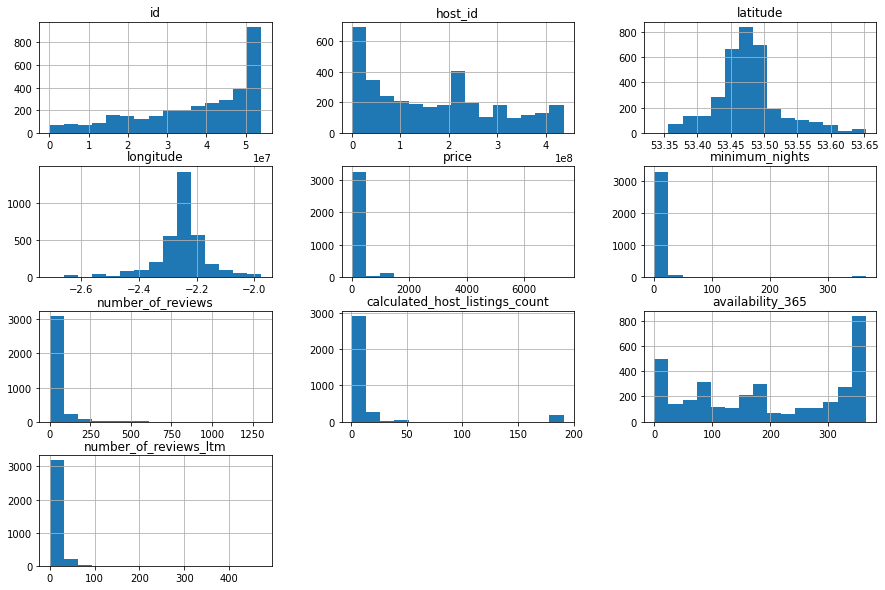

In [21]:
df.hist(bins=15, figsize=(15,10));

Analisando a tabela com os dados estatísticos, podemos dizer que a média dos alugueis em Manchester é de **163,69 libras esterlinas**, que é a moeda local. Ainda sobre o preço, podemos ver que a mediana (o valor que está exatamente no meio do conjunto de dados) é quase metade da média. Isso pode ser um forte indicativo de que há outliers nessa coluna. Sobre o mínimo de noites para aluguel, a média de diárias mínimas alugadas é de aproximadamente 9, valor bem distante da mediana também. 
Sobre como calular esses outliers, vamos falar na prózima seção.

Para ajudar na compreensão e demonstrar visualmente esta grande variedade de dados, vamos exibir gráficos do tipo `boxplot`, que nos permitem ver os valores mais discrepantes como pontos mais afastados. Analisaremos apenas as variáveis `price`e `minimum_nights`, pois as outras, **para o nosso objetivo**, não são fundamentais.

##Outlier

A seguir, vamos analisar se nossa base possui muitos outliers, que são os dados muito discrepantes. Para isso, podemos utilizar algumas regras, dentre as quais podemos citar:
* IQR - que identica a "distância" entre os quartis 1 e 3, onde temos 75% dos dados, e pode nos dar os limites para considerarmos ou não algum dado como outilier. Essa regra é baseada no seguint intervalo:
  - outlier inferior `< q1 - 1.5 * iqr`
  - outlier superior `> q1 + 1.5 * iqr`
* Boxplot - Gráficos que mostram os outlier de forma mais direta
* Scatterplot - Gráfico de dispersão que mostras os dados mais distantes.

A seguir, vamos tratar os outliers das variáveis `price` e `minimum_nights`.

###Outlier Price

Vamos utilizar nosso IQR para tratar estes outliers e deixar nossa base mais enxuta, respeitando os limites encontrados. O pandas trás uma função nativa para que possammos trazer os valores dos limites dos quartis:

In [22]:
#Quartis
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)

#IQR
iqr_price = q3_price-q1_price

#Limites
ls_price = q3_price + (1.5*iqr_price)
li_price = q1_price - (1.5*iqr_price)

print("IQR: ",iqr_price)
print("Limite superior: ",ls_price)
print("Limite inferior: ",li_price)


IQR:  91.0
Limite superior:  272.5
Limite inferior:  -91.5


Com estes dados, podemos percerber que o limite inferior está abaixo de 0, o que significa que não temos outliers nesta condição, já que não há preço negativos. Caso sejma encontrados preços iguais a 0, devem ser excluídos. Vamos ver qual a porcentagem de dados são outlier:

In [23]:
#Quantidade de linhas onde os preços são maiores que o outlier
out_price = len(df.price[df.price>ls_price])
#Percentual de outlier
outlier = out_price/len(df.price)*100
print("Os outliers representem ",outlier,"% do nosso conjunto de dados")

Os outliers representem  9.57910014513788 % do nosso conjunto de dados


Entendemos que a quantidade de outlier não é tão representativa para nossos dados, e por isso podemos excluir este dados.
A seguir, vamos construir dois gráficos boxplot, de duas bibbliotecas distintas, para que possamos conhecer:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


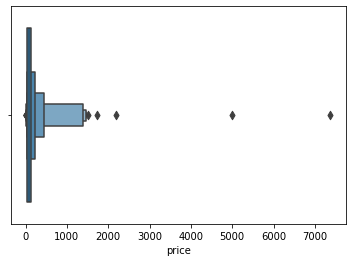

In [24]:
#boxplot price
sbn.boxenplot(df.price)

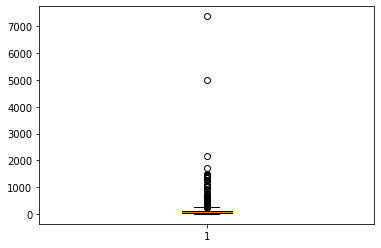

In [25]:
plt.boxplot(df.price)
plt.show()

Com os gráficos acima, podemos ver que há muitos registros de preços considerados outliers, mas a informação na fica clara. Por isso a importância do uso do IQR, que nos informa diretamente os valores. Agora vamos aplicar o mesmo processo para a variável `minimum_nights`.

###Outlier Minimum Nights

In [26]:
#Quartis:
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)

#IQR
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

#Limites
ls_minimum_nights = q3_minimum_nights + (1.5 * iqr_minimum_nights)
li_minimum_nights = q1_minimum_nights - (1.5 * iqr_minimum_nights)

print("IQR: ",iqr_minimum_nights)
print("Limite superior: ",ls_minimum_nights)
print("Limite inferior: ",li_minimum_nights)

IQR:  2.0
Limite superior:  6.0
Limite inferior:  -2.0


No caso desta variável, também sabemos que não teremos outliers inferiores, já que o limite inferior é um número negativo e não teremos aluguéis negativos. Com estes dados, podemos percerber que o limite inferior está abaixo de 0, o que significa que não temos outliers nesta condição, já que não há preço negativos. Caso sejma encontrados preços iguais a 0, devem ser excluídos. Vamos ver qual a porcentagem de dados são outlier:

In [27]:
#Quantidade de linhas onde os preços são maiores que o outlier
out_minimum_nights = len(df.minimum_nights[df.minimum_nights>ls_minimum_nights])

#Percentual de outlier
outlier_mn = out_minimum_nights/len(df.minimum_nights)*100
print("Os outliers representem ",outlier_mn,"% do nosso conjunto de dados")

Os outliers representem  11.81422351233672 % do nosso conjunto de dados


Vamos constuir os mesmos gráfico que utilizamos para a variável `price` para verificar se os dados se comportam de maneira parecida graficamente:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


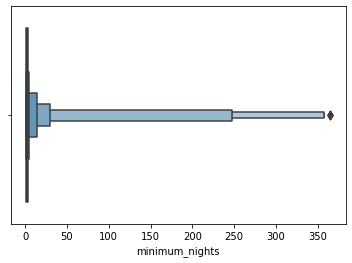

In [28]:
#boxplot minimum_nights
sbn.boxenplot(df.minimum_nights);

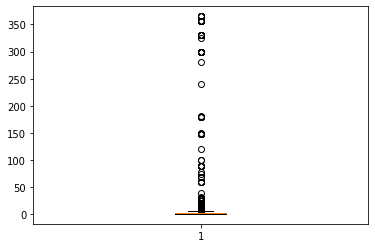

In [29]:
plt.boxplot(df.minimum_nights)
plt.show()

Com o gráfico acima, podemos ver que a quantidade minima de diárias, são bastante variados,e com poucos dados considerados outliers.

###Limpeza dos dados

Nesta seção vamos excluir os outliers, depois de análisá-los e identificar que não representam tanto valor para a nossa análise. Vamos gerar uma cópia deste conjunto, com os dados completos, para que possamos ter um ponto de restauração, caso seja preciso. Após a cópia, vamos excluir as linhas que representam os outliers das variáveis analisada.

In [30]:
#Cópia do dataset:
df_limpo = df.copy()

#Excluir linhas dos preços consideradas outliers:
df_limpo.drop(df_limpo[df_limpo.price>ls_price].index,axis=0, inplace = True)

#Excluir linhas dos preços com valor 0:
df_limpo.drop(df_limpo[df_limpo.price==0].index,axis=0, inplace = True)

#Excluir linhas das reserva consideradas outliers:
df_limpo.drop(df_limpo[df_limpo.minimum_nights>ls_minimum_nights].index,axis=0, inplace = True)

print("Tamanho antes da limpeza: ",df.shape)
print("Tamanho depois da limpeza: ",df_limpo.shape)
print("Excluímos ",df.shape[0] - df_limpo.shape[0], "linhas, o que representa ",
      (((df.shape[0] - df_limpo.shape[0]) / df.shape[0]) *100),"% dos nossos dados")



Tamanho antes da limpeza:  (3445, 17)
Tamanho depois da limpeza:  (2749, 17)
Excluímos  696 linhas, o que representa  20.203193033381712 % dos nossos dados


Após a limpeza podemos ver que perdemos algumas linhas, mas que ainda nos permitem fazer uma boa análise e agora com dados devidamente tratados. Para verificar graficamente as mudanas, vamos construir boxplot antes e depois da limpeza para as duas variáveis analisadas:

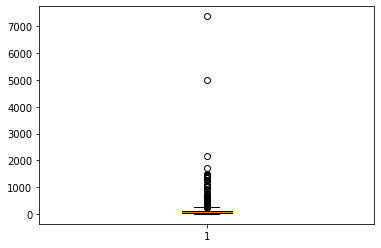

In [31]:
#Boxplot Price Antes
plt.boxplot(df.price)
plt.show()


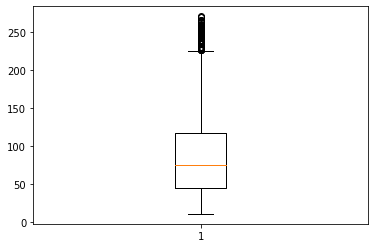

In [32]:
#Boxplot Price Depois
plt.boxplot(df_limpo.price)
plt.show()

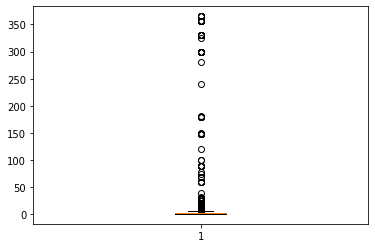

In [33]:
#Boxplot Minimum Night Antes
plt.boxplot(df.minimum_nights)
plt.show()

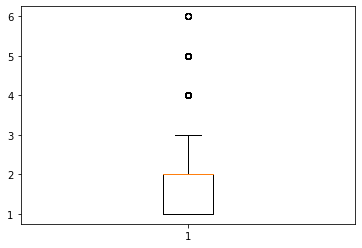

In [34]:
#Boxplot Minimum Night Depois
plt.boxplot(df_limpo.minimum_nights)
plt.show()

Vamos verificar novamente a distribuição dos dados e analisar se o que fizemos foi eficiente para a distribuição:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3860b54dd0>,
      dtype=object)

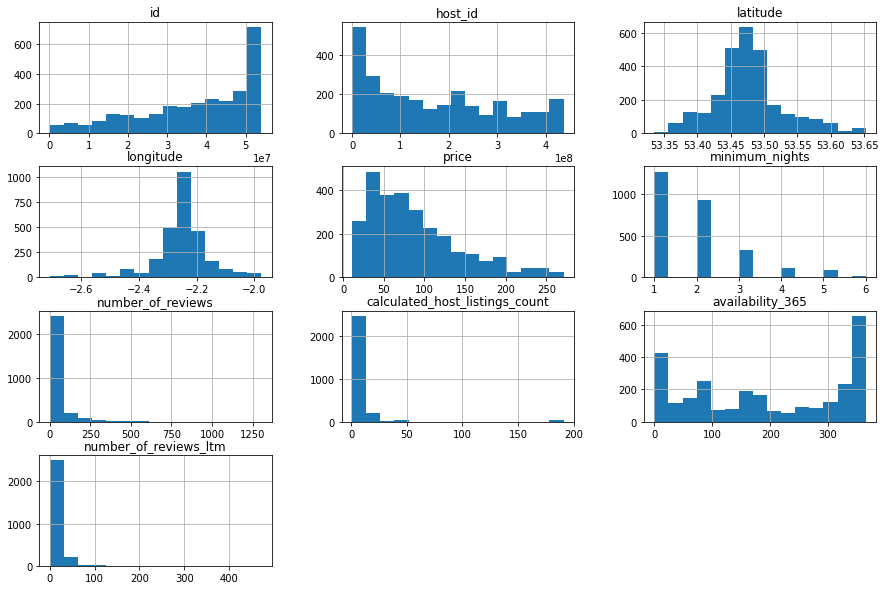

In [35]:
df_limpo.hist(bins=15, figsize=(15,10))

Podemos notar que a distribuição das duas variáveis tratadas, agora é bem mais próxima de uma distribuição normal, indicando uma melhora nos nossos dados para que sejam utilizados em modelos futuramente.

In [45]:
df_limpo.price.mean()

88.04692615496545

##Correlação das Variáveis

Agora vamos explorar as possíveis correlações entre as variáveis. Para isso, usaremos a função `corr`, que nos gera uma matriz de correlação. Pela definicição da correlação de Pearson, quanto mais próxima de 1 for a correlação, mais positivamente uma variável impacta na outra. Enquanto isso, quando o valor se aproxima de -1, siginifica uma relação negativa.

In [47]:
df_limpo.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.516556,0.089101,-0.020512,0.160159,-0.024920,-0.486995,0.137322,0.077370,-0.092639
host_id,0.516556,1.000000,0.113813,0.025934,0.074875,-0.126050,-0.251232,0.066971,0.015691,-0.055482
latitude,0.089101,0.113813,1.000000,-0.172030,0.021977,-0.041484,-0.078674,-0.019267,0.071473,-0.009828
longitude,-0.020512,0.025934,-0.172030,1.000000,0.064979,-0.047175,0.057832,-0.003928,0.050893,0.059179
price,0.160159,0.074875,0.021977,0.064979,1.000000,0.045851,-0.101061,-0.016786,0.052858,0.041803
minimum_nights,-0.024920,-0.126050,-0.041484,-0.047175,0.045851,1.000000,-0.054789,-0.053890,-0.013865,-0.076151
number_of_reviews,-0.486995,-0.251232,-0.078674,0.057832,-0.101061,-0.054789,1.000000,-0.084529,-0.013639,0.668282
calculated_host_listings_count,0.137322,0.066971,-0.019267,-0.003928,-0.016786,-0.053890,-0.084529,1.000000,0.136126,-0.070490
availability_365,0.077370,0.015691,0.071473,0.050893,0.052858,-0.013865,-0.013639,0.136126,1.000000,0.024091
number_of_reviews_ltm,-0.092639,-0.055482,-0.009828,0.059179,0.041803,-0.076151,0.668282,-0.070490,0.024091,1.000000


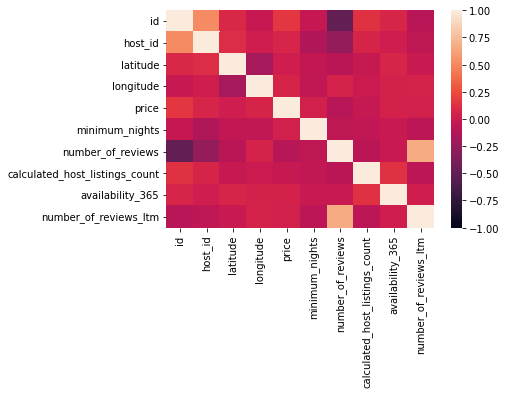

In [48]:
#gráfico de correlação entre as variáveis numéricas
sbn.heatmap(df_limpo.corr(),
            vmin = -1,
            vmax=1,);

Com o gráfico de correlação, podemos ver graficamente as informações da matriz gerada anteriormenta. É possível concluir por exemplo, que o número de revisões impacta negativamente no preço. Isso pode ocorrer por que um imóvel com mais revisões, podendo estas serem negativas, podem influenciar os clientes a não alugarem, o que pode fazer o preço ser mais baixo. Mas claro que esta é apenas uma hipótese que precisaria ser comprovada com as devidas técnicas que não nosso objeto de estudo no momento.

##Tipos de imóveis

A seguir, vamos analisar quantos são os imóveis dos tipos especificados na base:

In [53]:
#Quantidade de imóveis por tipo de quarto
df_limpo.room_type.value_counts()

Entire home/apt    1573
Private room       1142
Shared room          18
Hotel room           16
Name: room_type, dtype: int64

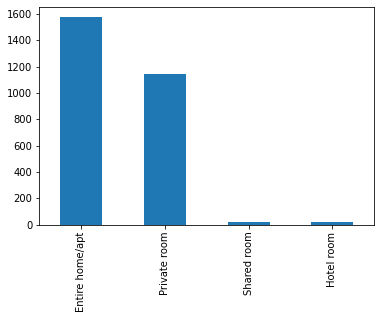

In [54]:
#Gráfico de barras com os tipos de quarto
df_limpo['room_type'].value_counts().plot(kind='bar');


##Médias de quantas noite, no mínimo, duram os aluguéis

Aqui podemos notar a grande diferença entre a média antes da limpeza dos dados e a média depois. Esta condiz muito mais com a realidade do negócio e pode nos levar a decisões mais acertadas.

In [49]:
#Com todos esses dados, podemos verificar por quantas noites no mínimo, em média, os imóveis ficam alugados?
int(df_limpo.minimum_nights.mean())


1

##Média de preços por bairro

Vamos analisar a média de preços por bairro, para sugerir possíveis pesquisas para os propiretários de imóveis nestes bairros. Talvez um determinado imóvel esteja muito distante do valor médio, e com esses dados, o proprietário pode se direcionar para novas deciões.

In [46]:
#Média preços por bairro
df_limpo.groupby(['neighbourhood']).price.mean().sort_values()

neighbourhood
Moston                              32.400000
Sharston                            42.750000
Brooklands                          51.300000
Charlestown                         53.000000
Woodhouse Park                      54.750000
Northenden                          56.166667
Burnage                             59.066667
Gorton North                        64.416667
Harpurhey                           65.413793
Rusholme                            67.688312
Chorlton Park                       69.571429
Gorton South                        70.000000
Bolton District                     70.095652
Tameside District                   70.726027
Wigan District                      71.506667
Baguley                             73.777778
Moss Side                           74.507692
Didsbury West                       76.857143
Levenshulme                         76.871795
Rochdale District                   77.139535
Chorlton                            78.240741
Stockport District  

In [42]:
#Quantidade de imóveis por bairro
df.neighbourhood.value_counts()

Salford District                   579
Trafford District                  293
Ancoats and Clayton                291
City Centre                        279
Stockport District                 185
Oldham District                    139
Bolton District                    121
Rusholme                           112
Ardwick                            105
Bury District                       99
Bradford                            96
Moss Side                           85
Wigan District                      83
Tameside District                   80
Hulme                               78
Cheetham                            61
Whalley Range                       60
Chorlton                            59
Didsbury West                       56
Longsight                           52
Gorton South                        48
Levenshulme                         47
Rochdale District                   47
Fallowfield                         44
Miles Platting and Newton Heath     44
Withington               

Analisando as médias de preços por bairro, podemos ver que agora os preços estão uma pouco mais parecidos, com uma variação menor.

##Mapa e gráfico de dispersão

A seguir, vamos plotar um mapa real da cidade e um mapa de dispersão, baseado nas coordenadas, para verificarmos se há muita difernça entre as duas condições:

In [52]:
#Mapa de Manchester
mapa = folium.Map(location=[ 53.483959,-2.244644])
mapa

A seguir, um gráfico de dispersão mostra a proximidade das cooredanadas da base de dados.

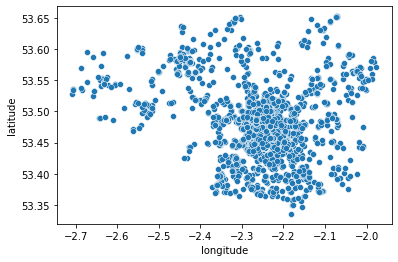

In [51]:

#df.plot(kind = 'scatter', x = df.latitude, y = df.longitude)
sbn.scatterplot(x=df_limpo["longitude"],y=df_limpo["latitude"]);

# Conclusões

##Outlier

Selecionamos duas importantes variáveis no dataset para analisar a influência de dados muito discrepantes: `price`e `minimum_nights`. Após aplicar o uso da métrica IQR, aliado ao bloxpot, podemos notar que os dados que se difereiciavam muito poderiam ser retirados do conjunto final, dando mais qualidade a qualquer que seja o trabalho futuro aplicado aos dados. Nesta seção, foi possível analisar a melhora significativa tanto no gráfico bloxpot, que antes não era claro, quanto no histograma que passou a mostrar uma distribuição um pouco mais normal. Este é um passo bem importante na preparação de qualquer projeto, pois é daqui que iremos deixar os dados o mais limpo possível para aplicarmos modelos.

##Tipo de imóvel

Sobre o tipo de imóvel, podemos percerber que as casa e apartamentos são os mais frequentes na base. Enquanto que quartos de hotel, são os menos registrados.

##Distribuição das variáveis

As variáveis que possuem a distruibuição mais próxima da normal, são as de longitude e latitude.

##Correlação

Nenhuma variável apresenta valor de correlação máximo ou mínimo, indicando que não há influência extremamente forte ou fraca de variável sobre outra. Mas há casos em que esse valor pode e deve ser mais estudado, podendo trazer base sólida para decisões.

##Distribuição por bairros

Sobre os bairros, podemos observar os valores médios de preço mais alto e baixos, respectivamente, nos bairros Ancoats and Clayton e City Centree Bolton. Mesmo após a limpeza na variável preço, é importante analisar mais afundo esta relação e garantir por exemplo, que a média possa ser utilizada por não estar sendo fortemente afetada por algum valor discrepante na quantidade de imóveis por bairro

#Considerações finais

Após concluir o desenvolvimento deste projeto, é possível perceber ainda mais claramente a importância de cada processo que compõe a ciência de dados (e ainda não chegamos em projetos que envolvam modelos). Podemos considerar este projeto, como algo básico, para fixar o conhecimento, mas um pouco além, podemos entender este trabalho como o primeiro grande passo que definirá todo o resto do caminho e que, justamente por isso, é o mais importante. Saber analisar um valor muito discrepante, conseguir identificar a importância de uma variável para determinado objetivo no negócio, dentre tantas outras partes "pequenas" é crucial para o bom desenvimento da carreira, e é assim que decido iniciar meu caminho neste mundo da ciência de dados. 